In [1]:
!pip3 install yahoofinancials #installing yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15191 sha256=c45bdc11d527dc9e0a9c5cafeb8d98fe994b2aaddd3710a6f8ab68e86b9c1f92
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [2]:
!pip3 install yfinance --upgrade #installing yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
#importing necessary modules
import numpy as np
import pandas as pd
import scipy.stats as scs
import scipy.optimize as sco
import yfinance as yf
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials
from datetime import datetime
plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]



## Constructing two portfolios from NYSE with one from Technology sector and the one from Finance sector between 2010 to 2019

In [4]:
 #technology sector
symbols1=['NOK', 'A', 'ATI', 'HLIO','ESE','MAXR']
portf1=yf.download (symbols1,start="2010-01-01",end="2019-12-31")
portf1=portf1['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [5]:
portf1.head()

,A,ATI,ESE,HLIO,MAXR,NOK
Date,,,,,,
2010-01-04,20.331635,41.265793,33.592861,15.376473,36.677246,8.746778
2010-01-05,20.110790,41.719639,32.787148,15.170636,36.677246,8.681260
2010-01-06,20.039330,42.732082,32.192013,14.948109,36.677246,8.615742
2010-01-07,20.013350,43.343040,32.649799,15.287464,35.666203,8.727121
2010-01-08,20.006845,44.355469,32.549103,15.459923,35.666203,8.733674


In [6]:
#Finance cooperations
symbols2=['BK', 'BOH', 'JPM', 'CM', 'HDB', 'MS'] 
portf2=yf.download (symbols2,start="2010-01-01",end="2019-12-31")
portf2=portf2['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [7]:
portf2.head()

,BK,BOH,CM,HDB,JPM,MS
Date,,,,,,
2010-01-04,21.379787,30.839260,17.941753,12.292129,30.742668,24.196255
2010-01-05,21.606508,30.767170,17.807896,12.344627,31.338154,25.080820
2010-01-06,21.281542,30.891685,17.739605,12.399891,31.510328,25.401770
2010-01-07,22.180872,31.651838,17.646727,12.597914,32.134514,25.769678
2010-01-08,22.316912,32.025372,17.780581,12.635675,32.055595,25.245207


In [8]:
#Defining a function that gives characteristics of each stock
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))

##Portfolio 1 Analysis

,A,ATI,ESE,HLIO,MAXR,NOK
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.010922,0.010938,-0.024277,-0.013477,0.000000,-0.007519
2010-01-06,-0.003560,0.023978,-0.018318,-0.014777,0.000000,-0.007576
2010-01-07,-0.001297,0.014196,0.014120,0.022448,-0.027953,0.012845
2010-01-08,-0.000325,0.023090,-0.003089,0.011218,0.000000,0.000751


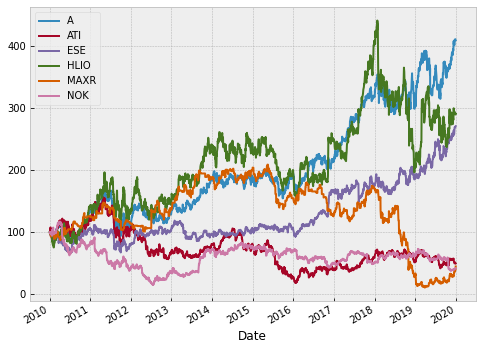

In [9]:
(portf1/ portf1.iloc[0]*100).plot(figsize=(8,6)) #plot for portfolio 1
log_returns1 = np.log(portf1 / portf1.shift(1)) # calculating returns for portfolio 1
log_returns1.head()

In [10]:
#Characteristics of portfolio 1
symbols1=['NOK', 'A', 'ATI', 'HLIO','ESE','MAXR']
for sym in symbols1:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    returns1= np.array(log_returns1[sym].dropna())
    print_statistics(returns1)


Results for symbol NOK
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.27022
           max         0.27218
          mean        -0.00035
           std         0.02676
          skew        -0.56564
      kurtosis        16.19166

Results for symbol A
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.11669
           max         0.11121
          mean         0.00056
           std         0.01767
          skew        -0.51264
      kurtosis         5.44088

Results for symbol ATI
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.20358
           max         0.27106
          mean        -0.00028
           std         0.03016
          skew         0.21582
      kurtosis         6.13526


In [11]:
portf1.corr() #correlation between stocks in portfolio 1

,A,ATI,ESE,HLIO,MAXR,NOK
A,1.000000,-0.472906,0.940750,0.863948,-0.450329,0.010877
ATI,-0.472906,1.000000,-0.446464,-0.417077,0.012681,0.275094
ESE,0.940750,-0.446464,1.000000,0.736550,-0.611531,-0.078729
HLIO,0.863948,-0.417077,0.736550,1.000000,-0.044773,-0.011659
MAXR,-0.450329,0.012681,-0.611531,-0.044773,1.000000,0.039108
NOK,0.010877,0.275094,-0.078729,-0.011659,0.039108,1.000000


## Portfolio 2 Analysis

,BK,BOH,CM,HDB,JPM,MS
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.010549,-0.002340,-0.007489,0.004262,0.019185,0.035906
2010-01-06,-0.015154,0.004039,-0.003842,0.004467,0.005479,0.012715
2010-01-07,0.041390,0.024309,-0.005249,0.015844,0.019615,0.014380
2010-01-08,0.006114,0.011732,0.007557,0.002993,-0.002459,-0.020562


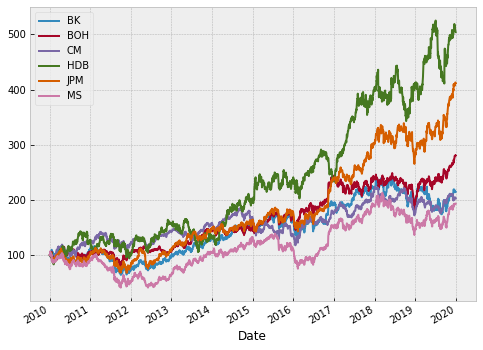

In [12]:
(portf2/ portf2.iloc[0]*100).plot(figsize=(8,6)) #plot for portfolio 2
log_returns2 = np.log(portf2 / portf2.shift(1)) #returns for portfolio 2
log_returns2.head()

In [13]:
#Characteristics of portfolio 2
symbols2=['BK', 'BOH', 'JPM', 'CM', 'HDB', 'MS'] 
for sym in symbols2:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    returns2= np.array(log_returns2[sym].dropna())
    print_statistics(returns2)


Results for symbol BK
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.10249
           max         0.07356
          mean         0.00030
           std         0.01551
          skew        -0.37950
      kurtosis         4.01135

Results for symbol BOH
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.08229
           max         0.05795
          mean         0.00041
           std         0.01323
          skew        -0.27279
      kurtosis         2.37067

Results for symbol JPM
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.09888
           max         0.08101
          mean         0.00056
           std         0.01579
          skew        -0.15486
      kurtosis         3.75588

In [14]:
portf2.corr() #correlation among stocks in a portfolio 2

,BK,BOH,CM,HDB,JPM,MS
BK,1.000000,0.956478,0.907537,0.904804,0.930222,0.959821
BOH,0.956478,1.000000,0.905704,0.937732,0.959173,0.915628
CM,0.907537,0.905704,1.000000,0.871515,0.913417,0.879823
HDB,0.904804,0.937732,0.871515,1.000000,0.968372,0.881090
JPM,0.930222,0.959173,0.913417,0.968372,1.000000,0.933479
MS,0.959821,0.915628,0.879823,0.881090,0.933479,1.000000




## Picking set of random portfolio weights, construct returns and covariance matrices and plotting time series for portfolios 

### Portfolio 1

In [15]:
symbols1=['NOK', 'A', 'ATI', 'HLIO','ESE','MAXR'] 
numassets1=len(symbols1)

In [16]:
portf1.cov()*252 #covariance matrix for portfolio 1

,A,ATI,ESE,HLIO,MAXR,NOK
A,74213.054624,-23243.828340,62839.022088,40957.503489,-35631.793425,71.318428
ATI,-23243.828340,32552.618431,-19751.225846,-13095.280304,664.554828,1194.628970
ESE,62839.022088,-19751.225846,60121.475976,31428.433561,-43551.235845,-464.633472
HLIO,40957.503489,-13095.280304,31428.433561,30283.866123,-2263.043962,-48.833018
MAXR,-35631.793425,664.554828,-43551.235845,-2263.043962,84359.609860,273.397136
NOK,71.318428,1194.628970,-464.633472,-48.833018,273.397136,579.320143


In [17]:
def minimize_wts(wts):
  return np.sum(portf1@wts)

bnd=tuple((0,1) for wts in range (numassets1)) #bounding weights to number of assets; in this case numassets1=6

#constraining weights to 100,000
cons=({'type':'eq','fun':lambda wts:np.sum(wts)-1},{'type':'eq','fun':lambda wts:np.sum(portf1@wts)-100000}) 
#minimizing weights on the numassets1
opts=sco.minimize(minimize_wts,numassets1*[1./numassets1,],method='SLSQP',bounds=bnd,constraints=cons)
wts=opts['x'] #list of weights
print('weights=',opts['x'])
print('portfolio sum=' ,np.sum(portf1@opts['x']).round(3)) #printing sum of the weights



weights= [0.20913442 0.1469721  0.21681717 0.16190899 0.24596248 0.01920484]
portfolio sum= 100000.0


In [18]:
portf1=portf1@wts #applying weights to portfolio 1
sum(portf1)


99999.99999999997

In [19]:
portf1.head()

Date
2010-01-04    29.279270
2010-01-05    29.090509
2010-01-06    29.058042
2010-01-07    29.050064
2010-01-08    29.203718
dtype: float64

Text(0.5, 1.0, 'time series plot for portfolio 1')

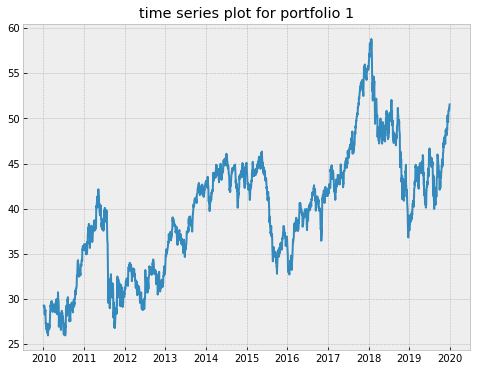

In [20]:
#time series plot for portfolio 1
plt.figure(figsize=(8,6))
plt.plot(portf1.index, portf1) 
plt.title("time series plot for portfolio 1")

###Portfolio 2 Analysis

In [21]:
symbols2=['BK', 'BOH', 'JPM', 'CM', 'HDB', 'MS']
numassets2=len(symbols2) 


In [22]:
portf2.cov()*252 #covariance matrix for portfolio 2

,BK,BOH,CM,HDB,JPM,MS
BK,27483.161353,41558.799902,13478.088399,35190.129784,65630.259693,26175.552490
BOH,41558.799902,68692.533000,21265.298028,57658.910944,106988.213108,39477.173040
CM,13478.088399,21265.298028,8025.298473,18316.329603,34824.404242,12965.766532
HDB,35190.129784,57658.910944,18316.329603,55038.447759,96685.118764,34003.661016
JPM,65630.259693,106988.213108,34824.404242,96685.118764,181120.861904,65352.289768
MS,26175.552490,39477.173040,12965.766532,34003.661016,65352.289768,27061.025619


In [23]:
#Defining random weights for portfolio 2 as done for portfolio 1
def minimize_wts(wts):
  return np.sum(portf2@wts)

bnd=tuple((0,1) for wts in range (numassets2))


cons=({'type':'eq','fun':lambda wts:np.sum(wts)-1},{'type':'eq','fun':lambda wts:np.sum(portf2@wts)-100000})

opts=sco.minimize(minimize_wts,numassets2*[1./numassets2,],method='SLSQP',bounds=bnd,constraints=cons)
wts=opts['x']
print('weights=',opts['x'])
print('portfolio sum=' ,np.sum(portf2@opts['x']).round(3))


weights= [0.14764874 0.21167534 0.13605163 0.13908365 0.23036081 0.13517983]
portfolio sum= 100000.0


In [24]:
portf2=portf2@wts
sum(portf1)


99999.99999999997

In [25]:
portf2.head()

Date
2010-01-04    24.188000
2010-01-05    24.452057
2010-01-06    24.511877
2010-01-07    25.013995
2010-01-08    25.047534
dtype: float64

Text(0.5, 1.0, 'time series plot for portfolio 2')

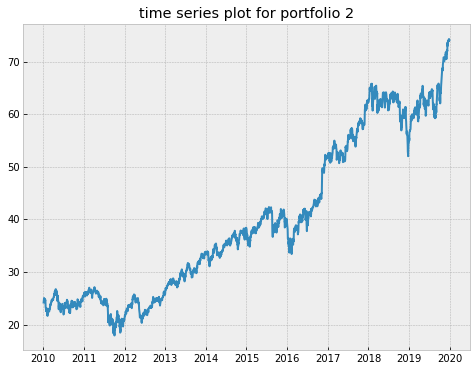

In [26]:
#time series plot for portfolio 2
plt.figure(figsize=(8,6))
plt.plot(portf2.index, portf2) 
plt.title("time series plot for portfolio 2")



## Constructing effiecient frontiers of the portfolios from 2010 up to 2015

In [27]:
#portfolio data for tech sector up to 2015
symbols=['NOK', 'A', 'ATI', 'HLIO','ESE','MAXR'] 
portfolio1=yf.download (symbols,start="2010-01-01",end="2015-12-31")
portfolio1=portfolio1['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [28]:
portfolio1_returns = np.log(portfolio1 / portfolio1.shift(1)) #returns of portfolio 1
portfolio1_returns.head()

,A,ATI,ESE,HLIO,MAXR,NOK
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.010922,0.010938,-0.024277,-0.013477,0.000000,-0.007519
2010-01-06,-0.003559,0.023978,-0.018318,-0.014777,0.000000,-0.007576
2010-01-07,-0.001297,0.014196,0.014120,0.022448,-0.027953,0.012845
2010-01-08,-0.000325,0.023090,-0.003089,0.011218,0.000000,0.000750


In [29]:
#portfolio data for finance sector up to 2015
symbols=['BK', 'BOH', 'JPM', 'CM', 'HDB', 'MS'] 
portfolio2=yf.download (symbols,start="2010-01-01",end="2015-12-31")
portfolio2=portfolio2['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [30]:
portfolio2_returns = np.log(portfolio2 / portfolio2.shift(1)) #returns for portfolio 2
portfolio2_returns.head()

,BK,BOH,CM,HDB,JPM,MS
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.010549,-0.002340,-0.007488,0.004262,0.019184,0.035905
2010-01-06,-0.015155,0.004039,-0.003842,0.004467,0.005480,0.012715
2010-01-07,0.041390,0.024309,-0.005249,0.015844,0.019615,0.014380
2010-01-08,0.006114,0.011733,0.007556,0.002993,-0.002459,-0.020562


### Portfolio 1 Analysis

In [31]:
prets=[] #portfolio returns list
pvols=[]#portfolio volatility list
for p in range(2500):
  wts=np.random.random(6) #weights for each stock
  wts=wts/np.sum(wts)
  prets.append(np.sum(portfolio1_returns.mean()*wts)*252) #Annual portfolio returns (for approximately 252 working days a year)
  pvols.append(np.sqrt(wts.T@(portfolio1_returns.cov()*252@wts)))#Annual portfolio volatility 

In [32]:
 # Change from prets as list to prets as numpy array
prets=np.array(prets) 
pvols=np.array(pvols)

In [33]:
# Function to calculate statistics of rets and vols - the new prets,pvols
def stats(wts):
  prets=np.sum(portfolio1_returns.mean()*wts)*252
  pvols=np.sqrt(wts.T@(portfolio1_returns.cov()*252@wts))
  srs=prets/pvols  # Sharpe ratios (Sharpe ratio is return/volatility(std))
  return np.array([prets,pvols,srs])

In [34]:
# Functions to be minimized
def func_to_maximize_sharpe(wts):
  return(-stats(wts)[2])   
def func_to_minimize_var(wts):
  return((stats(wts)[1])**2)
def func_to_minimize_std(wts):
  return(stats(wts)[1])

In [35]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons=({'type': 'eq','fun': lambda x: np.sum(x)-1})  # equality constraint components of x add up to 1
bnds=tuple((0,1) for x in range(6))   # components of x between 0 and 1

In [36]:
y=6*[1./6,] # Creates a list of numassets x 1/numassets - used for starting values in optimizer
print(np.array(y))
func_to_maximize_sharpe(np.array(y))

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


-0.022368924219432453

In [37]:
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

## Maximizing Sharpe, minimizing -Sharpe, details in variable opts

In [38]:
%%time
# Maximize Sharpe ratio
opts=sco.minimize(func_to_maximize_sharpe,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)

CPU times: user 75 ms, sys: 0 ns, total: 75 ms
Wall time: 75.3 ms


In [39]:
opts

     fun: -0.4590313873196535
     jac: array([ 1.38234347e-04,  1.54019119e+00,  2.81321555e-01, -4.86411154e-04,
       -3.72529030e-09,  6.29323989e-01])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.42249313, 0.        , 0.        , 0.12004021, 0.45746667,
       0.        ])

In [40]:
opts['x'].round(3)   # x is the optimized portfolio with criterion the Sharpe Ratio

array([0.422, 0.   , 0.   , 0.12 , 0.457, 0.   ])

In [41]:
stats(opts['x']).round(3)

array([0.095, 0.206, 0.459])

## Minimum Variance Portfolio - details in variable optv

In [42]:
%%time
# Minimize variance
optv=sco.minimize(func_to_minimize_var,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)

CPU times: user 82.8 ms, sys: 848 µs, total: 83.6 ms
Wall time: 87 ms


In [43]:
optv

     fun: 0.035433907707304056
     jac: array([0.07101929, 0.07165738, 0.07057675, 0.07347842, 0.07087881,
       0.07151395])
 message: 'Optimization terminated successfully'
    nfev: 64
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.89901386e-01, 0.00000000e+00, 2.46066004e-01, 1.86347248e-19,
       5.05926929e-01, 5.81056809e-02])

In [44]:
stats(optv['x']).round(3)

array([0.057, 0.188, 0.305])

In [45]:
%%time
trets=np.linspace(0.0,0.15,50)
tvols=[] #total volatility list
for tret in trets:
  cons=({'type': 'eq','fun': lambda x: stats(x)[0]-tret},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
  res=sco.minimize(func_to_minimize_std,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons) #using the function func_to_minimize_std defined above
  tvols.append(res['fun'])
tvols=np.array(tvols) #changig the list to the array

CPU times: user 10.8 s, sys: 40.5 ms, total: 10.9 s
Wall time: 11.5 s


## Capital Market line

In [46]:
# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 
# hyperbola/parabola
ind=np.argmin(tvols)
evols=tvols[ind:]
erets=trets[ind:]

In [47]:
r0=.02 #risk free rate
slopes=(erets-r0)/evols

In [48]:
def cml(x,slope_max,r0):
  return r0+slope_max*x
sgpts=np.linspace(0,0.4,100)

In [49]:
print((erets[np.argmax(slopes)],evols[np.argmax(slopes)]))

(0.09489795918367347, 0.2067390748080301)


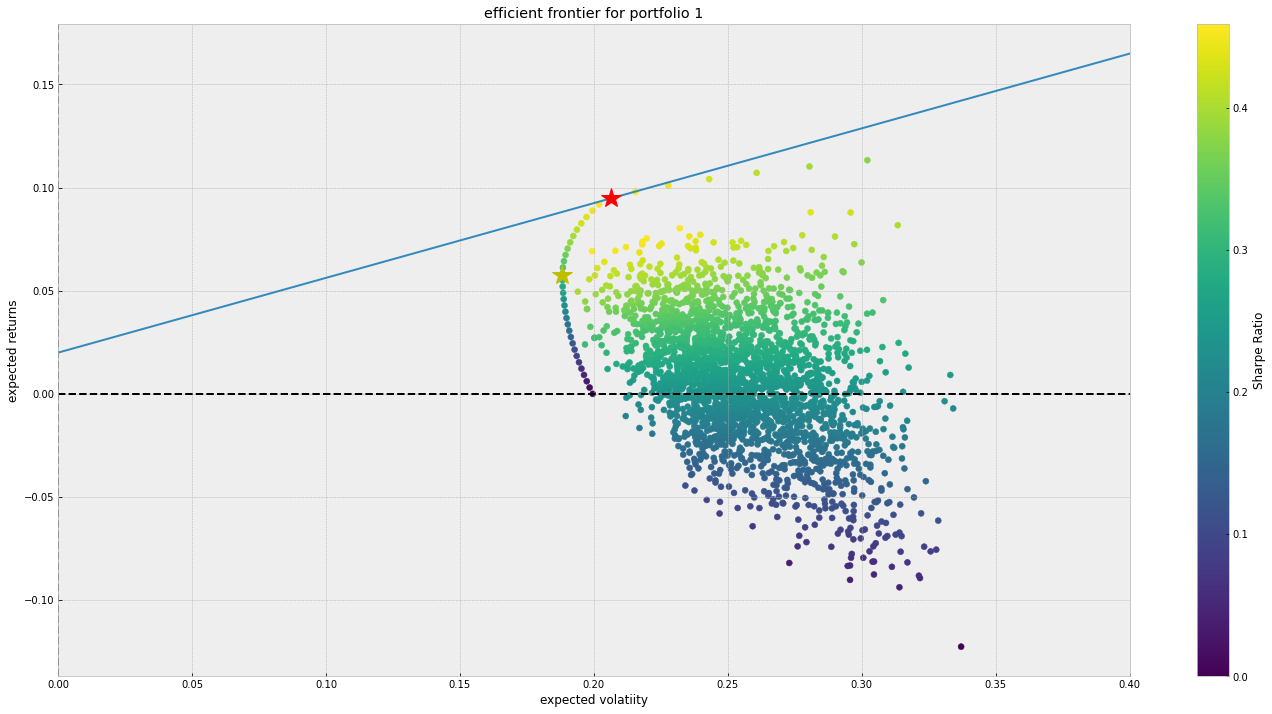

In [50]:
plt.figure(figsize=(24,12))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.scatter(tvols,trets,c=trets/tvols,marker='o')
plt.plot(sgpts,cml(sgpts,slopes[np.argmax(slopes)],0.02))
plt.plot(stats(opts['x'])[1],stats(opts['x'])[0],'r*',markersize=20.0)  # portfolio with min variance
plt.plot(stats(optv['x'])[1],stats(optv['x'])[0],'y*',markersize=20.0)  # portfolio with min variance
plt.grid='true'
plt.xlim(0.0,0.4)
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.title("efficient frontier for portfolio 1")
plt.colorbar(label='Sharpe Ratio')
plt.axhline(0,color='k',ls='--',lw=2.0)
plt.axvline(0,color='k',ls='--',lw=2.0)

###Portifolio 2 Analysis

Repeating the process done with portfolio 1 on portfolio 2 

In [51]:
prets=[]
pvols=[]
for p in range(2500):
  wts=np.random.random(6)
  wts=wts/np.sum(wts)
  prets.append(np.sum(portfolio2_returns.mean()*wts)*252)
  pvols.append(np.sqrt(wts.T@(portfolio2_returns.cov()*252@wts)))

In [52]:
prets=np.array(prets)  # Change from prets as list to prets as numpy array
pvols=np.array(pvols)

In [53]:
# Function to calculate statistics of rets and vols - the new prets,pvols
def stats(wts):
  prets=np.sum(portfolio2_returns.mean()*wts)*252
  pvols=np.sqrt(wts.T@(portfolio2_returns.cov()*252@wts))
  srs=prets/pvols  
  return np.array([prets,pvols,srs])

# Functions that we will minimize
def func_to_maximize_sharpe(wts):
  return(-stats(wts)[2])  
def func_to_minimize_var(wts):
  return((stats(wts)[1])**2)
def func_to_minimize_std(wts):
  return(stats(wts)[1])



In [54]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons=({'type': 'eq','fun': lambda x: np.sum(x)-1})  # equality constraint components of x add up to 1
bnds=tuple((0,1) for x in range(6))   # components of x between 0 and 1

y=6*[1./6,] 
print(np.array(y))
func_to_maximize_sharpe(np.array(y))

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


-0.36141578892333187

In [55]:
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

## Maximizing Sharpe, minimizing -Sharpe, details in variable opts

In [56]:
%%time
# Maximize Sharpe ratio
opts=sco.minimize(func_to_maximize_sharpe,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)

opts

CPU times: user 105 ms, sys: 0 ns, total: 105 ms
Wall time: 133 ms


     fun: -0.5157281560770073
     jac: array([ 4.39855605e-02, -3.00876796e-04,  1.89913586e-02,  3.23899090e-04,
       -8.18602741e-04,  4.66173381e-01])
 message: 'Optimization terminated successfully'
    nfev: 57
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([6.30157612e-17, 4.80113210e-01, 9.37044517e-17, 4.97515835e-01,
       2.23709547e-02, 0.00000000e+00])

In [57]:
opts['x'].round(3)   # x is the optimized portfolio with criterion the Sharpe Ratio

array([0.   , 0.48 , 0.   , 0.498, 0.022, 0.   ])

In [58]:
stats(opts['x']).round(3)

array([0.116, 0.225, 0.516])

## Minimum Variance Portfolio - details in variable optv

In [59]:
%%time
# Minimize variance
optv=sco.minimize(func_to_minimize_var,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
optv


CPU times: user 114 ms, sys: 0 ns, total: 114 ms
Wall time: 133 ms


     fun: 0.030794542240346365
     jac: array([0.06442984, 0.06199685, 0.06134879, 0.06154518, 0.06855648,
       0.08616481])
 message: 'Optimization terminated successfully'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.00000000e+00, 3.56408748e-01, 5.96134691e-01, 4.74565607e-02,
       7.46456727e-19, 0.00000000e+00])

In [60]:
stats(optv['x']).round(3)

array([0.068, 0.175, 0.39 ])

In [61]:
%%time
trets=np.linspace(0.0,0.15,50)
tvols=[]
for tret in trets:
  cons=({'type': 'eq','fun': lambda x: stats(x)[0]-tret},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
  res=sco.minimize(func_to_minimize_std,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
  tvols.append(res['fun'])
tvols=np.array(tvols)

CPU times: user 10.5 s, sys: 49.9 ms, total: 10.5 s
Wall time: 11.7 s


## Capital Market line

In [62]:
# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 
# hyperbola/parabola
ind=np.argmin(tvols)
evols=tvols[ind:]
erets=trets[ind:]

r0=.02
slopes=(erets-r0)/evols



In [63]:
def cml(x,slope_max,r0):
  return r0+slope_max*x
sgpts=np.linspace(0,0.4,100)

In [64]:
print((erets[np.argmax(slopes)],evols[np.argmax(slopes)]))

(0.1193877551020408, 0.2319980719617577)


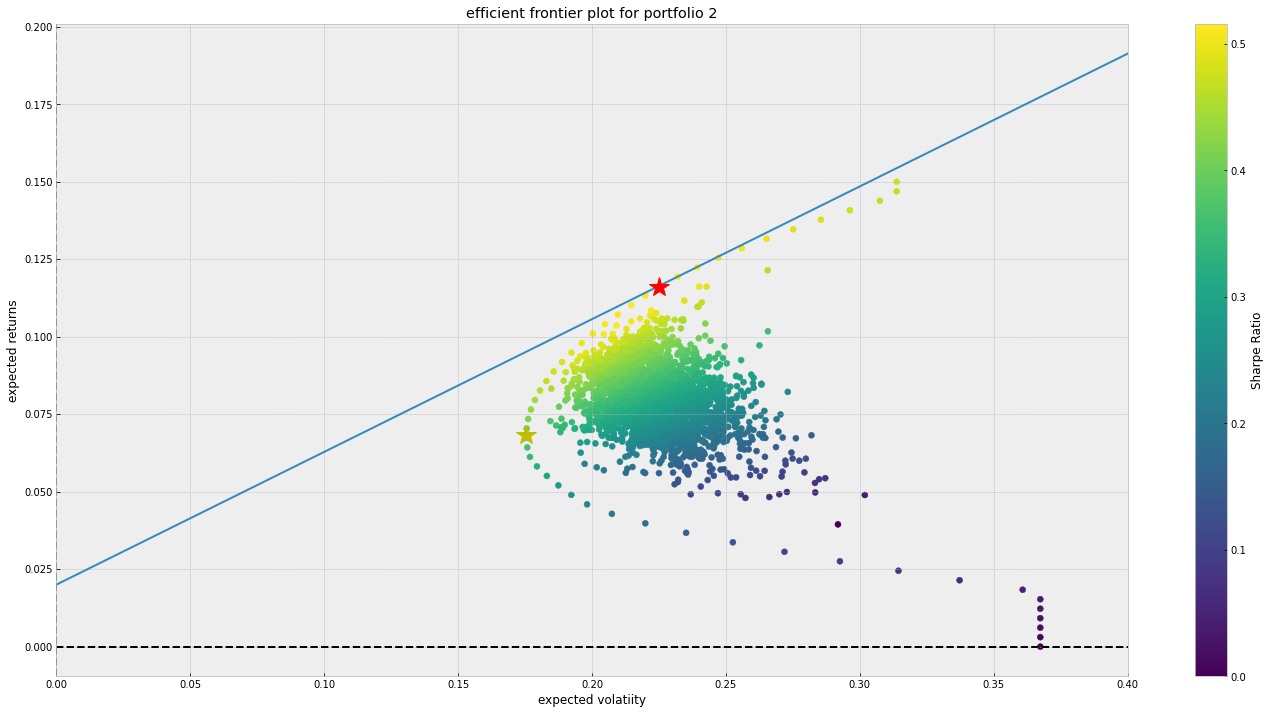

In [65]:
plt.figure(figsize=(24,12))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.scatter(tvols,trets,c=trets/tvols,marker='o')
plt.plot(sgpts,cml(sgpts,slopes[np.argmax(slopes)],0.02))
plt.plot(stats(opts['x'])[1],stats(opts['x'])[0],'r*',markersize=20.0)  # portfolio with min variance
plt.plot(stats(optv['x'])[1],stats(optv['x'])[0],'y*',markersize=20.0)  # portfolio with min variance
plt.grid='true'
plt.xlim(0.0,0.4)
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharpe Ratio')
plt.title("efficient frontier plot for portfolio 2")
plt.axhline(0,color='k',ls='--',lw=2.0)
plt.axvline(0,color='k',ls='--',lw=2.0)



##From 2016 to 2019, Constructing effiecient frontiers of the portfolios with one portfolio having a risk free rate of 2% and another one without a risk free rate

In [66]:
#portfolio data for tech sector from 2016 to 2019
symbols=['NOK', 'A', 'ATI', 'HLIO','ESE','MAXR'] 
portfol1=yf.download (symbols,start="2016-01-01",end="2019-12-31")
portfol1=portfol1['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [67]:
port_retns1=np.log(portfol1/portfol1.shift(1)) #returns for portfolio 1
port_retns1.head()

,A,ATI,ESE,HLIO,MAXR,NOK
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.003447,-0.029141,-0.005985,-0.029883,0.000000,-0.004187
2016-01-06,0.004429,-0.042092,-0.011790,-0.028720,0.000000,-0.009839
2016-01-07,-0.043403,-0.116849,-0.028758,-0.029212,-0.014168,0.008439
2016-01-08,-0.010568,-0.004211,-0.024105,-0.038221,0.000000,0.026263


In [68]:
#portfolio data for finance sector up to 2015
symbols=['BK', 'BOH', 'JPM', 'CM', 'HDB', 'MS'] 
portfol2=yf.download (symbols,start="2016-01-01",end="2019-12-31")
portfol2=portfol2['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [69]:
port_retns2=np.log(portfol2/portfol2.shift(1)) #returns for portfolio 2
port_retns2.head()

,BK,BOH,CM,HDB,JPM,MS
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.003760,-0.002268,-0.001370,0.010635,0.001728,-0.006373
2016-01-06,-0.025433,-0.002760,-0.012878,0.001486,-0.014541,-0.025252
2016-01-07,-0.025569,-0.022528,-0.019004,-0.028968,-0.041280,-0.051121
2016-01-08,-0.018403,-0.014912,-0.009321,-0.006306,-0.022654,-0.020921


### Portfolio 1 Analysis

In [70]:
#Defining random weights for portfolio 1
def minimize_wgts(wgts):
  return np.sum(portfol1@wgts)

bnd=tuple((0,1) for wts in range (6))


#cons=({'type':'eq','fun':lambda wgts:np.sum(wgts)-1},{'type':'eq','fun':lambda wgts:np.sum(portfol1@wgts)-100000})

opts=sco.minimize(minimize_wgts,6*[1./6,],method='SLSQP',bounds=bnd,constraints=cons)
wgts=opts['x']
print('weights=',opts['x'])
print('portfolio sum=' ,np.sum(portfol1@opts['x']).round(3))


weights= [0.00000000e+00 9.16661360e-01 0.00000000e+00 2.95209497e-03
 3.03677842e-04 1.02434655e-01]
portfolio sum= 20162.704


In [71]:
portfol1=portfol1@wts
sum(portfol1)


38981.198763865235

In [72]:
prets=[]
pvols=[]
for p in range(2500):
  wts=np.random.random(6)
  wts=wts/np.sum(wts)
  prets.append(np.sum(port_retns1.mean()*wts)*252)
  pvols.append(np.sqrt(wts.T@(port_retns1.cov()*252@wts)))

In [73]:
prets=np.array(prets)  # Change from prets as list to prets as numpy array
pvols=np.array(pvols)

In [74]:
# Function to calculate statistics of rets and vols - the new prets,pvols
def stats(wts):
  prets=np.sum(port_retns1.mean()*wts)*252
  pvols=np.sqrt(wts.T@(port_retns1.cov()*252@wts))
  srs=prets/pvols  # Sharpe ratios (Sharpe ratio is return/volatility(std))
  return np.array([prets,pvols,srs])

# Functions that we will minimize
def func_to_maximize_sharpe(wts):
  return(-stats(wts)[2])   # Note that minimizing minus the ratio gives us the max on changin sign
def func_to_minimize_var(wts):
  return((stats(wts)[1])**2)
def func_to_minimize_std(wts):
  return(stats(wts)[1])

In [75]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons=({'type': 'eq','fun': lambda x: np.sum(x)-1})  # equality constraint components of x add up to 1
bnds=tuple((0,1) for x in range(6))   # components of x between 0 and 1

y=6*[1./6,] # Creates a list of numassets x 1/numassets - used for starting values in optimizer
print(np.array(y))
func_to_maximize_sharpe(np.array(y))

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


-0.19009019232406027

In [76]:
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

## Maximizing Sharpe, minimizing -Sharpe, details in variable opts

In [77]:
%%time
# Maximize Sharpe ratio
opts=sco.minimize(func_to_maximize_sharpe,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)

opts

CPU times: user 46.1 ms, sys: 0 ns, total: 46.1 ms
Wall time: 46.1 ms


     fun: -1.1648400714721647
     jac: array([-1.26659870e-05,  5.08220077e-01,  7.04824924e-06,  5.55768251e-01,
        1.95222363e+00,  1.22731625e+00])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([3.57458031e-01, 1.26743234e-15, 6.42541969e-01, 3.73876277e-15,
       1.34690436e-15, 1.99872670e-15])

In [78]:
opts['x'].round(3)   # x is the optimized portfolio with criterion the Sharpe Ratio

array([0.357, 0.   , 0.643, 0.   , 0.   , 0.   ])

In [79]:
stats(opts['x']).round(3)

array([0.228, 0.196, 1.165])

## Minimum Variance Portfolio - details in variable optv

In [80]:
%%time
# Minimize variance
optv=sco.minimize(func_to_minimize_var,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
optv

CPU times: user 84.1 ms, sys: 972 µs, total: 85.1 ms
Wall time: 86.6 ms


     fun: 0.033237175042516
     jac: array([0.06691253, 0.080522  , 0.06614311, 0.06875069, 0.06595392,
       0.06638828])
 message: 'Optimization terminated successfully'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([3.93694313e-01, 2.71050543e-20, 4.09444361e-01, 5.42101086e-20,
       4.59051330e-02, 1.50956193e-01])

In [81]:
stats(optv['x']).round(3)

array([0.144, 0.182, 0.789])

In [82]:
%%time
trets=np.linspace(0.0,0.25,50)
tvols=[]
for tret in trets:
  cons=({'type': 'eq','fun': lambda x: stats(x)[0]-tret},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
  res=sco.minimize(func_to_minimize_std,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
  tvols.append(res['fun'])
tvols=np.array(tvols)

CPU times: user 5.33 s, sys: 36.1 ms, total: 5.36 s
Wall time: 5.4 s


## Capital Market line

In [83]:
# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 
# hyperbola/parabola
ind=np.argmin(tvols)
evols=tvols[ind:]
erets=trets[ind:]

r0=.02
slopes=(erets-r0)/evols

In [84]:
def cml(x,slope_max,r0):
  return r0+slope_max*x
sgpts=np.linspace(0,0.4,100)

In [85]:
print((erets[np.argmax(slopes)],evols[np.argmax(slopes)]))

(0.22959183673469385, 0.19724583684353234)


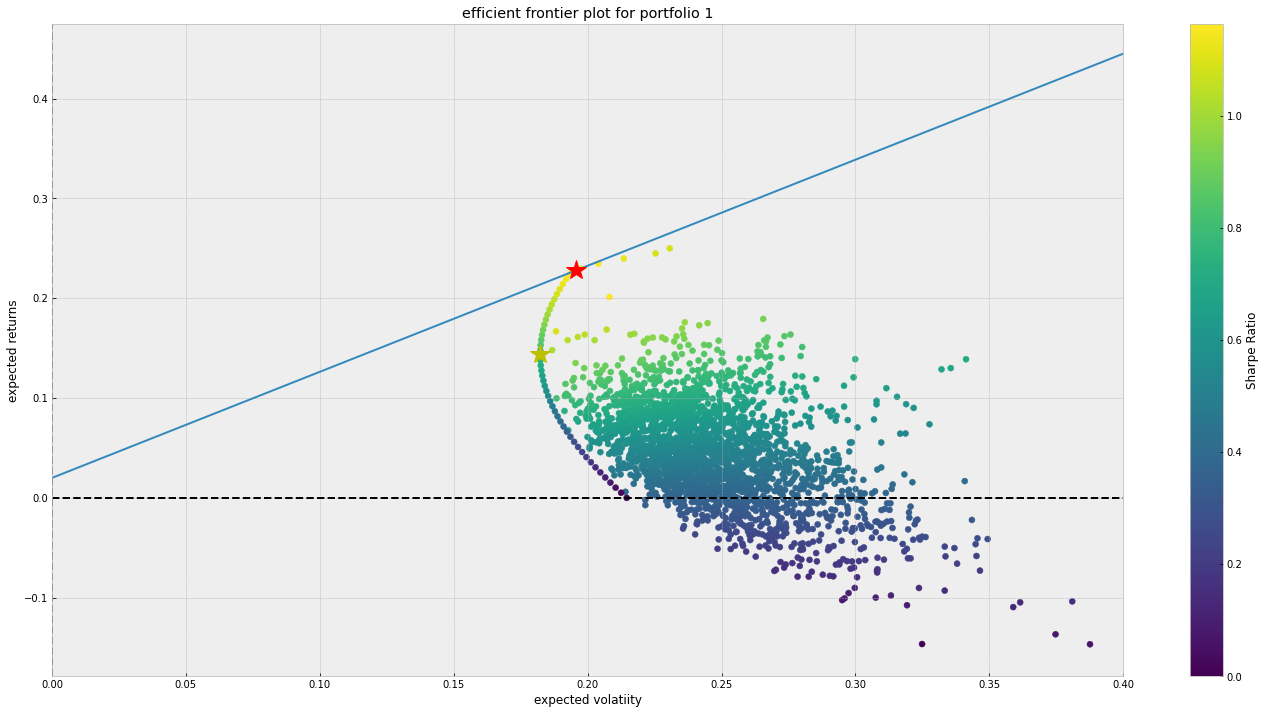

In [86]:
plt.figure(figsize=(24,12))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.scatter(tvols,trets,c=trets/tvols,marker='o')
plt.plot(sgpts,cml(sgpts,slopes[np.argmax(slopes)],0.02))
plt.plot(stats(opts['x'])[1],stats(opts['x'])[0],'r*',markersize=20.0)  # portfolio with min variance
plt.plot(stats(optv['x'])[1],stats(optv['x'])[0],'y*',markersize=20.0)  # portfolio with min variance
plt.grid='true'
plt.xlim(0.0,0.4)
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharpe Ratio')
plt.title("efficient frontier plot for portfolio 1")
plt.axhline(0,color='k',ls='--',lw=2.0)
plt.axvline(0,color='k',ls='--',lw=2.0)

### Portfolio 2 Analysis

In [87]:
def minimize_wts(wts):
  return np.sum(portfol2@wts)

bnd=tuple((0,1) for wts in range (numassets2))


cons=({'type':'eq','fun':lambda wts:np.sum(wts)-1},{'type':'eq','fun':lambda wts:np.sum(portfol2@wts)-100000})
res=sco.minimize(minimize_wts,numassets1*[1./numassets1,],method='SLSQP',bounds=bnd,constraints=cons)
opts=sco.minimize(minimize_wts,numassets1*[1./numassets1,],method='SLSQP',bounds=bnd,constraints=cons)
wts=opts['x']


In [88]:
portfol2=portfol2@wts
sum(portfol2)
#portf2=portf2@wts

51677.40897178552

In [89]:
portfol2.head()

Date
2016-01-04    35.949608
2016-01-05    35.942684
2016-01-06    35.499708
2016-01-07    34.401857
2016-01-08    33.849124
dtype: float64

In [90]:
prets=[]
pvols=[]
for p in range(2500):
  wts=np.random.random(6)
  wts=wts/np.sum(wts)
  prets.append(np.sum(port_retns2.mean()*wts)*252)
  pvols.append(np.sqrt(wts.T@(port_retns2.cov()*252@wts)))

In [91]:
prets=np.array(prets)  # Change from prets as list to prets as numpy array
pvols=np.array(pvols)

In [92]:
# Function to calculate statistics of rets and vols - the new prets,pvols
def stats(wts):
  prets=np.sum(port_retns2.mean()*wts)*252
  pvols=np.sqrt(wts.T@(port_retns2.cov()*252@wts))
  srs=prets/pvols  # Sharpe ratios (Sharpe ratio is return/volatility(std))
  return np.array([prets,pvols,srs])

# Functions that we will minimize
def func_to_maximize_sharpe(wts):
  return(-stats(wts)[2])   # Note that minimizing minus the ratio gives us the max on changin sign
def func_to_minimize_var(wts):
  return((stats(wts)[1])**2)
def func_to_minimize_std(wts):
  return(stats(wts)[1])

In [93]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons=({'type': 'eq','fun': lambda x: np.sum(x)-1})  # equality constraint components of x add up to 1
bnds=tuple((0,1) for x in range(6))   # components of x between 0 and 1

y=6*[1./6,] # Creates a list of numassets x 1/numassets - used for starting values in optimizer
print(np.array(y))
func_to_maximize_sharpe(np.array(y))

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


-0.8847591260612957

In [94]:
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

## Maximizing Sharpe, minimizing -Sharpe, details in variable opts

In [95]:
%%time
# Maximize Sharpe ratio
opts=sco.minimize(func_to_maximize_sharpe,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)

opts

CPU times: user 57.8 ms, sys: 2.05 ms, total: 59.8 ms
Wall time: 60.4 ms


     fun: -1.214994715556776
     jac: array([ 5.67885578e-01,  1.02976039e-01,  2.56299973e-05,  2.24709511e-05,
       -1.53183937e-05,  6.45286143e-01])
 message: 'Optimization terminated successfully'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.00000000e+00, 1.92034456e-16, 7.57906428e-03, 3.97513132e-01,
       5.94907804e-01, 0.00000000e+00])

In [96]:
opts['x'].round(3) 

array([0.   , 0.   , 0.008, 0.398, 0.595, 0.   ])

In [97]:
stats(opts['x']).round(3)

array([0.208, 0.172, 1.215])

## Minimum Variance Portfolio - details in variable optv

In [98]:
%%time
# Minimize variance
optv=sco.minimize(func_to_minimize_var,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
optv

CPU times: user 97.9 ms, sys: 0 ns, total: 97.9 ms
Wall time: 102 ms


     fun: 0.018933097821486465
     jac: array([0.03814613, 0.03790856, 0.03780201, 0.03791017, 0.04008103,
       0.05134936])
 message: 'Optimization terminated successfully'
    nfev: 78
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([4.84138849e-02, 1.98991959e-01, 5.09058958e-01, 2.43535198e-01,
       3.25260652e-19, 0.00000000e+00])

In [99]:
stats(optv['x']).round(3)

array([0.13 , 0.138, 0.947])

In [100]:
%%time
trets=np.linspace(0.0,0.25,60)
tvols=[]
for tret in trets:
  cons=({'type': 'eq','fun': lambda x: stats(x)[0]-tret},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
  res=sco.minimize(func_to_minimize_std,6*[1./6,],method='SLSQP',bounds=bnds,constraints=cons)
  tvols.append(res['fun'])
tvols=np.array(tvols)

CPU times: user 15.2 s, sys: 81.9 ms, total: 15.3 s
Wall time: 15.3 s


## Capital Market line

In [101]:
# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 
# hyperbola/parabola
ind=np.argmin(tvols)
evols=tvols[ind:]
erets=trets[ind:]

#r0=.02
#slopes=(erets-r0)/evols

In [102]:
#def cml(x,slope_max,r0):
  #return r0+slope_max*x
def cml(x,slope_max):
  return slope_max*x 
sgpts=np.linspace(0,0.4,100)

In [103]:
print((erets[np.argmax(slopes)],evols[np.argmax(slopes)]))

(0.2033898305084746, 0.1675121020512055)


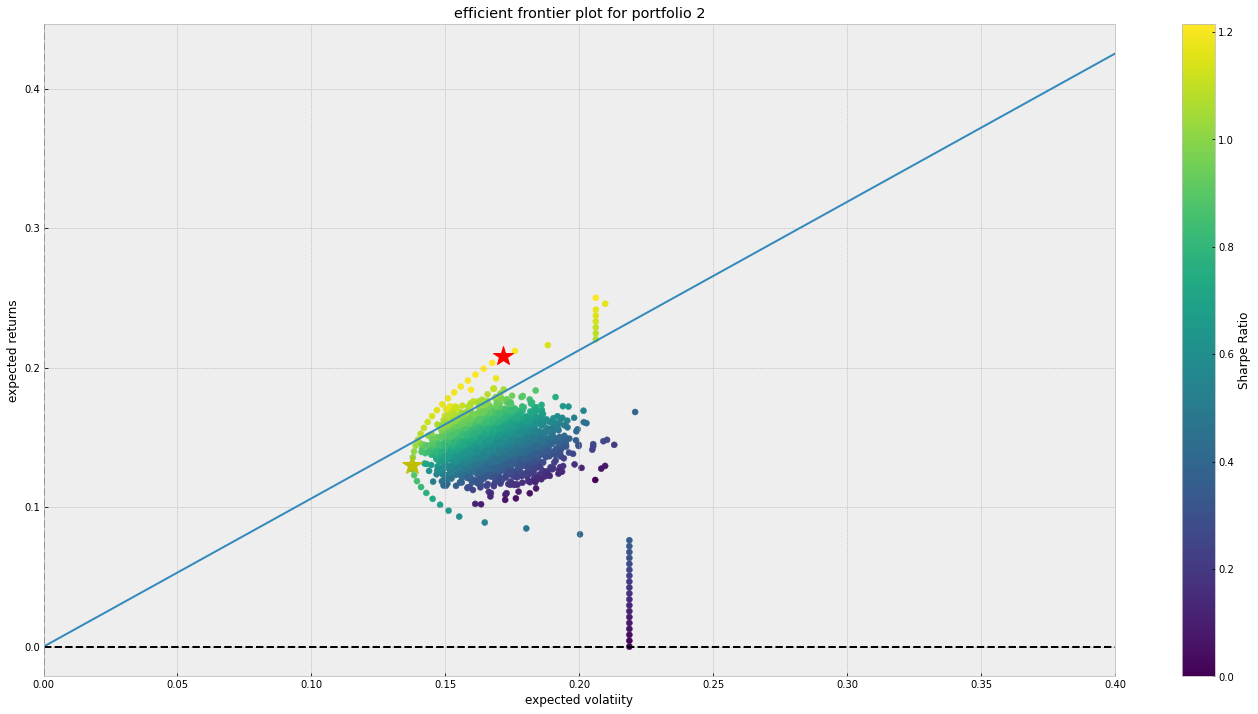

In [104]:
plt.figure(figsize=(24,12))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.scatter(tvols,trets,c=trets/tvols,marker='o')
plt.plot(sgpts,cml(sgpts,slopes[np.argmax(slopes)]))
plt.plot(stats(opts['x'])[1],stats(opts['x'])[0],'r*',markersize=20.0)  # portfolio with min variance
plt.plot(stats(optv['x'])[1],stats(optv['x'])[0],'y*',markersize=20.0)  # portfolio with min variance
plt.grid='true'
plt.xlim(0.0,0.4)
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharpe Ratio')
plt.title("efficient frontier plot for portfolio 2")
plt.axhline(0,color='k',ls='--',lw=2.0)
plt.axvline(0,color='k',ls='--',lw=2.0)

## Rebalancing the portfolios annually from 2016 up to 2019

#### Rebalancing is basically the process of determining underperforming stocks and reallocating them with others in a portfolio.

In [105]:
#The function below will take data, name of stocks and the number of underperfoming stocks to be removed monthly.

def portfolio(data, numStocks, numRev):
    df = data.copy()
    selected_stocks = []
    avg_monthly_ret = [0]
  #Looping through the returns, sort them and append lists selected_stocks for top perfoming stocks
    for i in range(len(df)):
        if len(selected_stocks ) > 0:
            avg_monthly_ret.append(df[selected_stocks].iloc[i,:].mean()) #Addinf the mean monthly return to list avg_monthly_ret
            bad_stocks = df[selected_stocks].iloc[i,:].sort_values(ascending=True)[:numRev].index.values.tolist()
            selected_stocks  = [t for t in selected_stocks if t not in bad_stocks]
        fill = numStocks - len(selected_stocks)
        new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        selected_stocks  = selected_stocks  + new_picks
        print(selected_stocks) #this will give best perfomed stocks and the last perfoming stocks
    returns_df = pd.DataFrame(np.array(avg_monthly_ret),columns=["monthly_returns"])
    return returns_df 

In [106]:
#The functions defined are some key perfomance indicators of stocks annually
def CAGR(data): #Cumulative Annual Growth rate
    df = data.copy()
    df['cumulative_returns'] = (1 + df['monthly_returns']).cumprod()
    trading_months = 12
    n = len(df)/ trading_months
    cagr = (df['cumulative_returns'][len(df)-1])**(1/n) - 1
    return cagr

def volatility(data): #Rate at which stock price rise and fall annually
    df = data.copy()
    trading_months = 12
    vol = df['monthly_returns'].std() * np.sqrt(trading_months)
    return vol

def sharpe_ratio(data, rf):#the average return earned in excess of the risk-free rate per unit of volatility
    df = data.copy()
    sharpe = (CAGR(df) - rf)/ volatility(df)
    return sharpe 

def maximum_drawdown(data): #peak-to-trough decline of an investment during a specific time.
    df = data.copy()
    df['cumulative_returns'] =  (1 + df['monthly_returns']).cumprod()
    df['cumulative_max'] = df['cumulative_returns'].cummax()
    df['drawdown'] = df['cumulative_max'] - df['cumulative_returns']
    df['drawdown_pct'] = df['drawdown'] / df['cumulative_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd


## Portfolio 1

In [107]:
tickers1=['NOK', 'A', 'ATI', 'HLIO','ESE','MAXR'] #technology sector
portfo1=yf.download (tickers1,start="2016-01-01",end="2019-12-31", interval='1mo') #downloading data
portfo1=portfo1.dropna() #removing missing values

[*********************100%***********************]  6 of 6 completed


In [108]:
portfo1_returns = pd.DataFrame()

for ticker in tickers1:
    portfo1_returns[ticker] = portfo1['Adj Close'][ticker].pct_change() #percentage changes of Adjusted close prices as monthly returns

portfo1_returns = portfo1_returns.dropna()



['ATI', 'HLIO', 'MAXR', 'ESE', 'A', 'NOK']
['ATI', 'HLIO', 'ESE', 'A', 'ATI', 'HLIO']
['HLIO', 'A', 'HLIO', 'MAXR', 'HLIO', 'A']
['A', 'MAXR', 'A', 'A', 'ESE', 'NOK']
['MAXR', 'ESE', 'NOK', 'ATI', 'HLIO', 'NOK']
['ESE', 'NOK', 'ATI', 'NOK', 'ATI', 'A']
['ESE', 'NOK', 'NOK', 'A', 'MAXR', 'ESE']
['ESE', 'NOK', 'NOK', 'ESE', 'ATI', 'HLIO']
['ESE', 'ESE', 'HLIO', 'ESE', 'MAXR', 'A']
['ESE', 'ESE', 'HLIO', 'ESE', 'HLIO', 'ATI']
['ESE', 'ESE', 'ESE', 'NOK', 'A', 'ESE']
['A', 'ATI', 'MAXR', 'A', 'ESE', 'HLIO']
['A', 'A', 'ESE', 'HLIO', 'NOK', 'A']
['ESE', 'NOK', 'MAXR', 'ESE', 'NOK', 'A']
['NOK', 'NOK', 'A', 'HLIO', 'NOK', 'A']
['NOK', 'NOK', 'HLIO', 'NOK', 'NOK', 'HLIO']
['NOK', 'NOK', 'NOK', 'NOK', 'MAXR', 'ATI']
['MAXR', 'ATI', 'ATI', 'MAXR', 'NOK', 'ESE']
['MAXR', 'ATI', 'ATI', 'MAXR', 'HLIO', 'ATI']
['ATI', 'ATI', 'HLIO', 'ATI', 'ATI', 'HLIO']
['HLIO', 'HLIO', 'MAXR', 'HLIO', 'A', 'ATI']
['HLIO', 'HLIO', 'HLIO', 'A', 'ESE', 'HLIO']
['HLIO', 'HLIO', 'HLIO', 'HLIO', 'HLIO', 'ATI']
['ATI', 

Text(0.5, 0, 'months')

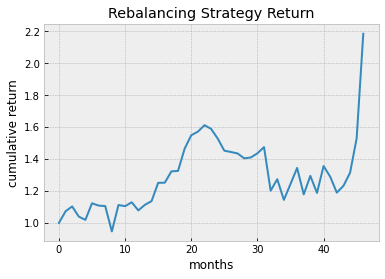

In [109]:
#Plotting the outcomes

rebalanced_portfolio = portfolio(portfo1_returns, 6, 2)
print("Rebalanced Portfolio Performance")
print("CAGR: " + str(CAGR(rebalanced_portfolio)))
print("Sharpe Ratio: " + str(sharpe_ratio(rebalanced_portfolio, 0.02)))
print("Maximum Drawdown: " + str(maximum_drawdown(rebalanced_portfolio) ))
plt.title("Rebalancing Strategy Return")
print("\n")

plt.plot((1+portfolio(portfo1_returns, 6, 2)).cumprod())
plt.ylabel("cumulative return")
plt.xlabel("months")
#ax.legend(["Strategy Return","Index Return"])

This means MAXR was the best perfoming stock at the end of 2019

## Portfolio 2

### Repeating the same steps for portfolio 2

In [110]:
tickers2=['BK', 'BOH', 'JPM', 'CM', 'HDB', 'MS'] #Finance sector
portfo2=yf.download (tickers2,start="2016-01-01",end="2019-12-31", interval='1mo')
portfo2=portfo2.dropna()

[*********************100%***********************]  6 of 6 completed


In [111]:
portfo2_returns = pd.DataFrame()
for i in tickers2:
    portfo2_returns[i] = portfo2['Adj Close'][i].pct_change()

portfo2_returns = portfo2_returns.dropna()



['BOH', 'CM', 'BK', 'MS', 'JPM', 'HDB']
['BOH', 'CM', 'JPM', 'HDB', 'HDB', 'CM']
['CM', 'JPM', 'CM', 'CM', 'BK', 'MS']
['JPM', 'BK', 'MS', 'BOH', 'BK', 'JPM']
['JPM', 'MS', 'BOH', 'JPM', 'HDB', 'CM']
['JPM', 'MS', 'JPM', 'HDB', 'MS', 'HDB']
['JPM', 'MS', 'JPM', 'MS', 'MS', 'JPM']
['MS', 'MS', 'MS', 'BOH', 'HDB', 'MS']
['MS', 'MS', 'MS', 'MS', 'BK', 'MS']
['MS', 'JPM', 'BOH', 'BK', 'CM', 'HDB']
['MS', 'JPM', 'BOH', 'CM', 'JPM', 'BOH']
['MS', 'JPM', 'CM', 'JPM', 'HDB', 'CM']
['MS', 'JPM', 'JPM', 'HDB', 'MS', 'JPM']
['JPM', 'JPM', 'HDB', 'JPM', 'HDB', 'BK']
['HDB', 'HDB', 'BK', 'HDB', 'MS', 'BK']
['HDB', 'HDB', 'HDB', 'HDB', 'BK', 'MS']
['BK', 'MS', 'JPM', 'BK', 'BOH', 'MS']
['BK', 'MS', 'BK', 'MS', 'HDB', 'CM']
['BK', 'BK', 'HDB', 'HDB', 'JPM', 'BK']
['BK', 'BK', 'JPM', 'BK', 'BOH', 'MS']
['JPM', 'BOH', 'MS', 'JPM', 'MS', 'CM']
['JPM', 'BOH', 'JPM', 'CM', 'BK', 'HDB']
['JPM', 'JPM', 'CM', 'HDB', 'CM', 'HDB']
['JPM', 'JPM', 'HDB', 'HDB', 'JPM', 'MS']
['JPM', 'JPM', 'JPM', 'MS', 'BK', 'JPM

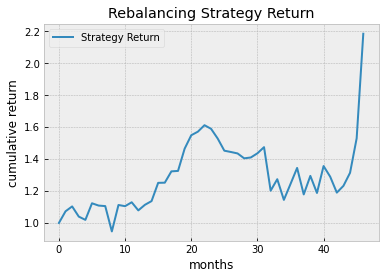

In [112]:
rebalanced_portfolio = portfolio(portfo2_returns, 6, 2)
print("Rebalanced Portfolio Performance")
print("CAGR: " + str(CAGR(rebalanced_portfolio)))
print("Sharpe Ratio: " + str(sharpe_ratio(rebalanced_portfolio, 0.02)))
print("Maximum Drawdown: " + str(maximum_drawdown(rebalanced_portfolio) ))

print("\n")

fig, ax = plt.subplots()
plt.plot((1+portfolio(portfo1_returns, 6, 2)).cumprod())
plt.title("Rebalancing Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"])

So, JPM was the best perfoming portfolio at the end of 2019